# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom

Lab Number: 2

## Data Preparation - 15pts
This section describes the data preparation steps that were taken on the US Accidents dataset. As a refresher, the data dataset is a country wide dataset covering 49 states within the United States. The data has been collected from several data sources which broadcast traffic accident related information. The dataset spans the time period of Feburary 2016 through December 2019. The data was sourced from the Kaggle website (https://www.kaggle.com/sobhanmoosavi/us-accidents).

First we will setup the notebook by importing the required libraries.

In [26]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML
from sklearn import ensemble
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.feature_selection import RFE

#ignore warnings
import warnings
warnings.simplefilter('ignore')

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

Now we'll load the pre-cleaned data files from previous work. We've saved this data into files in order to same memory usage. This data has already been split into training and test datasets using an 80/20 split of data. Since this data is temporal all data has been sorted by the 'Start_Date' field. This allows us to obtain approximately 50 months of training data and 7 months of test data. 

In [104]:
#Read in the train/test files that have been created from the prior projects. This is an 80/20 split
train_file = 'train.csv'
test_file = 'test.csv'
test_filepath_BC = '/home/jbcroom/'
train_filepath_BC = '/home/jbcroom/'
test_filepath_BC2 = 'C:/RAI/'
train_filepath_BC2 = 'C:/RAI/'

testfilepath_AR = ''
train_filepath_AR = ''

test_filepath_JB = ''
train_filepath_JB = ''

test_filepath_SO = ''
train_filepath_SO = ''

#read in the training and test data 
df_test = pd.read_csv(test_filepath_BC2 + test_file,index_col=0)
df_train = pd.read_csv(train_filepath_BC2 + train_file,index_col=0)

#filter down the data to the state of Texas. 
df_test = df_test[df_test['ST_TX'] == 1]
df_train = df_train[df_train['ST_TX'] == 1]

Verify that our data has loaded correctly for the test and traing dataframes.

In [105]:
df_test.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Hour,Time_Duration(min),State,Timezone,Start_Time,Weather_Condition,SM_Interim,Side_,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Weekday_Fri,Start_Weekday_Mon,Start_Weekday_Sat,Start_Weekday_Sun,Start_Weekday_Thu,Start_Weekday_Tue,Start_Weekday_Wed,Start_Month_Apr,Start_Month_Aug,Start_Month_Dec,Start_Month_Feb,Start_Month_Jan,Start_Month_Jul,Start_Month_Jun,Start_Month_Mar,Start_Month_May,Start_Month_Nov,Start_Month_Oct,Start_Month_Sep,ST_AL,ST_AR,ST_AZ,ST_CA,ST_CO,ST_CT,ST_DC,ST_DE,ST_FL,ST_GA,ST_IA,ST_ID,ST_IL,ST_IN,ST_KS,ST_KY,ST_LA,ST_MA,ST_MD,ST_ME,ST_MI,ST_MN,ST_MO,ST_MS,ST_MT,ST_NC,ST_ND,ST_NE,ST_NH,ST_NJ,ST_NM,ST_NV,ST_NY,ST_OH,ST_OK,ST_OR,ST_PA,ST_RI,ST_SC,ST_SD,ST_TN,ST_TX,ST_UT,ST_VA,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,Weather_Condition_Collapsed_Ash,Weather_Condition_Collapsed_Clear,Weather_Condition_Collapsed_Clear/Windy,Weather_Condition_Collapsed_Cloudy,Weather_Condition_Collapsed_Cloudy/Windy,Weather_Condition_Collapsed_Dust,Weather_Condition_Collapsed_Dust/Windy,Weather_Condition_Collapsed_Fog,Weather_Condition_Collapsed_Fog/Windy,Weather_Condition_Collapsed_Icy,Weather_Condition_Collapsed_Icy/Snow,Weather_Condition_Collapsed_Icy/Windy,Weather_Condition_Collapsed_Rain,Weather_Condition_Collapsed_Rain/Snow,Weather_Condition_Collapsed_Rain/Windy,Weather_Condition_Collapsed_Rainy,Weather_Condition_Collapsed_Sand,Weather_Condition_Collapsed_Sand/Windy,Weather_Condition_Collapsed_Smoke,Weather_Condition_Collapsed_Smoke/Windy,Weather_Condition_Collapsed_Snow,Weather_Condition_Collapsed_Snow/Windy,Weather_Condition_Collapsed_Snowy,Weather_Condition_Collapsed_Tornado,TMC_200.0,TMC_201.0,TMC_202.0,TMC_203.0,TMC_206.0,TMC_222.0,TMC_229.0,TMC_236.0,TMC_239.0,TMC_241.0,TMC_244.0,TMC_245.0,TMC_246.0,TMC_247.0,TMC_248.0,TMC_336.0,TMC_339.0,TMC_341.0,TMC_343.0,TMC_351.0,TMC_406.0
18,1.0,32.771553,-96.809906,0.0,67.0,67.0,87.0,29.22,10.0,8.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,45.0,TX,US/Central,2019-05-08 07:40:39,Light Rain,May,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0.0,30.350788,-97.675995,0.0,71.0,71.0,93.0,29.04,2.0,6.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,53.0,TX,US/Central,2019-05-08 07:41:06,Fog,May,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0.0,29.511009,-98.631416,0.0,73.0,73.0,100.0,28.97,3.0,13.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,53.0,TX,US/Central,2019-05-08 07:41:59,Light Rain,May,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,1.0,32.778530,-96.812065,0.0,67.0,67.0,87.0,29.22,10.0,8.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,44.0,TX,US/Central,2019-05-08 07:42:10,Light Rain,May,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,1.0,32.665859,-97.240738,0.0,66.0,66.0,94.0,28.94,7.0,7.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,230.0,TX,US/Central,2019-05-08 07:43:16,Mostly Cloudy,May,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [106]:
df_train.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Hour,Time_Duration(min),State,Timezone,Start_Time,Weather_Condition,SM_Interim,Side_,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Weekday_Fri,Start_Weekday_Mon,Start_Weekday_Sat,Start_Weekday_Sun,Start_Weekday_Thu,Start_Weekday_Tue,Start_Weekday_Wed,Start_Month_Apr,Start_Month_Aug,Start_Month_Dec,Start_Month_Feb,Start_Month_Jan,Start_Month_Jul,Start_Month_Jun,Start_Month_Mar,Start_Month_May,Start_Month_Nov,Start_Month_Oct,Start_Month_Sep,ST_AL,ST_AR,ST_AZ,ST_CA,ST_CO,ST_CT,ST_DC,ST_DE,ST_FL,ST_GA,ST_IA,ST_ID,ST_IL,ST_IN,ST_KS,ST_KY,ST_LA,ST_MA,ST_MD,ST_ME,ST_MI,ST_MN,ST_MO,ST_MS,ST_MT,ST_NC,ST_ND,ST_NE,ST_NH,ST_NJ,ST_NM,ST_NV,ST_NY,ST_OH,ST_OK,ST_OR,ST_PA,ST_RI,ST_SC,ST_SD,ST_TN,ST_TX,ST_UT,ST_VA,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,Weather_Condition_Collapsed_Ash,Weather_Condition_Collapsed_Clear,Weather_Condition_Collapsed_Clear/Windy,Weather_Condition_Collapsed_Cloudy,Weather_Condition_Collapsed_Cloudy/Windy,Weather_Condition_Collapsed_Dust,Weather_Condition_Collapsed_Dust/Windy,Weather_Condition_Collapsed_Fog,Weather_Condition_Collapsed_Fog/Windy,Weather_Condition_Collapsed_Icy,Weather_Condition_Collapsed_Icy/Snow,Weather_Condition_Collapsed_Icy/Windy,Weather_Condition_Collapsed_Rain,Weather_Condition_Collapsed_Rain/Snow,Weather_Condition_Collapsed_Rain/Windy,Weather_Condition_Collapsed_Rainy,Weather_Condition_Collapsed_Sand,Weather_Condition_Collapsed_Sand/Windy,Weather_Condition_Collapsed_Smoke,Weather_Condition_Collapsed_Smoke/Windy,Weather_Condition_Collapsed_Snow,Weather_Condition_Collapsed_Snow/Windy,Weather_Condition_Collapsed_Snowy,Weather_Condition_Collapsed_Tornado,TMC_200.0,TMC_201.0,TMC_202.0,TMC_203.0,TMC_206.0,TMC_222.0,TMC_229.0,TMC_236.0,TMC_239.0,TMC_241.0,TMC_244.0,TMC_245.0,TMC_246.0,TMC_247.0,TMC_248.0,TMC_336.0,TMC_339.0,TMC_341.0,TMC_343.0,TMC_351.0,TMC_406.0
32408,0.0,32.860638,-96.719559,0.0,90.0,93.0,57.0,29.77,10.0,10.4,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,62.0,TX,US/Central,2016-06-14 20:06:43,Partly Cloudy,Jun,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32416,0.0,30.335411,-97.703049,0.0,89.1,93.0,61.0,29.80,10.0,5.8,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,51.0,TX,US/Central,2016-06-14 20:17:03,Clear,Jun,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32423,0.0,29.757492,-95.365791,0.0,86.0,93.0,66.0,29.84,8.0,9.2,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,46.0,TX,US/Central,2016-06-14 20:21:49,Clear,Jun,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32431,0.0,29.821486,-95.368080,0.0,84.2,93.0,70.0,29.84,8.0,9.2,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,46.0,TX,US/Central,2016-06-14 20:26:55,Clear,Jun,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32460,0.0,32.871536,-96.683105,0.0,88.0,93.0,61.0,29.78,10.0,8.1,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,30.0,TX,US/Central,2016-06-14 20:49:39,Scattered Clouds,Jun,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

Over the course of the EDA the data has been reshaped to allow for easier analysis. Those changes are:

- Creation of a new feature called Weather Condition Collapsed. Upon further review of the Weather Condition feature there were data inconsistences in the data that needed to be addressed. For example, a weather condition may be listed as 'Thunderstorm' or 'T-Storm'. These are in effect the same condition. To alleviate this inconsistency the data was re-mapped to ensure these were removed. 


- One-hot encoding of the features: State, Start_Month, Start_Day, Sunrise_Sunset, Side, Weather_Condition_Collapsed, TMC

These changes can be seen in the data listings above. 

Prepare the data frames with the training and test data to split into our independent and dependent variables. We'll also remove the original versions of the columns that were one-hot encoded as well as the dependent variable. The TMC variable, even though one hot encoded, will be removed as well. This variable provided data leakage in the model and should be removed to prevent further leakage.

In order to ensure we do not have poorly trained models we'll take a validation set of data using 20% of the training data. This will provide us a good way to test and manipulate models without impacting our test data set.  

We'll build our first data sets using severity as the dependent variable. 

In [107]:
# Get validation set off of last 20% of train data
df_train=df_train.sort_values("Start_Time")
train_size = int(len(df_train) * 0.8)

X_train, X_val = df_train[0:train_size], df_train[train_size:len(df_train)]

y = df_train['Severity']
y_train, y_val = y[0:train_size], y[train_size:len(y)]

#Build training/validation set for severity
df_X_train = X_train.copy()
df_X_test = X_val.copy()

df_Y_train = y_train.copy()
df_Y_test = y_val.copy()

#list columns to remove:
#removeList = {'Severity', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time','Unnamed: 0', 'TMC_200.0',
#    'TMC_201.0','TMC_202.0','TMC_203.0',
#    'TMC_206.0','TMC_222.0','TMC_229.0',
#    'TMC_236.0','TMC_239.0','TMC_241.0',
#    'TMC_244.0','TMC_245.0','TMC_246.0',
#    'TMC_247.0','TMC_248.0','TMC_336.0',
#    'TMC_339.0','TMC_341.0','TMC_343.0',
#    'TMC_351.0','TMC_406.0'} 

removeList = {'Severity', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time', 'TMC_200.0',
              'TMC_201.0','TMC_202.0','TMC_203.0',
              'TMC_206.0','TMC_222.0','TMC_229.0',
              'TMC_236.0','TMC_239.0','TMC_241.0',
              'TMC_244.0','TMC_245.0','TMC_246.0',
              'TMC_247.0','TMC_248.0','TMC_336.0',
              'TMC_339.0','TMC_341.0','TMC_343.0',
              'TMC_351.0','TMC_406.0','ST_AL','ST_AR','ST_AZ','ST_CA','ST_CO','ST_CT','ST_DC','ST_DE',
              'ST_FL','ST_GA','ST_IA','ST_ID','ST_IL','ST_IN','ST_KS','ST_KY','ST_LA','ST_MA','ST_MD',
              'ST_ME','ST_MI','ST_MN','ST_MO','ST_MS','ST_MT','ST_NC','ST_ND','ST_NE','ST_NH','ST_NJ',
              'ST_NM','ST_NV','ST_NY','ST_OH','ST_OK','ST_OR','ST_PA','ST_RI','ST_SC','ST_SD','ST_TN',
              'ST_TX','ST_UT','ST_VA','ST_VT','ST_WA','ST_WI','ST_WV','ST_WY'} 

df_X_train.drop(removeList,1,inplace=True)
df_X_test.drop(removeList,1,inplace=True)

Check our data frames to ensure that we had the appropriate data removed and also check the shape of the data frames is consistent

In [108]:
print("X-train: ",df_X_train.shape)
print("Y-train: ",df_Y_train.shape)
print("X-test: ",df_X_test.shape)
print("Y-test: ",df_Y_test.shape)

X-train:  (163692, 73)
Y-train:  (163692,)
X-test:  (40923, 73)
Y-test:  (40923,)


Check the data distribution to verify if we have a balanced or imbalanced model. In this case we look fairly balanced.

In [109]:
df_train['Severity'].value_counts(normalize=True) 

0.0    0.752022
1.0    0.247978
Name: Severity, dtype: float64

In [110]:
X_train['Severity'].value_counts(normalize=True )

0.0    0.749633
1.0    0.250367
Name: Severity, dtype: float64

In [111]:
X_val['Severity'].value_counts(normalize=True)

0.0    0.761577
1.0    0.238423
Name: Severity, dtype: float64

## Modeling and Evaluation - 70pts

In this section various models will be built out and evaluated. Models  evaluations will be performed on both Severity (a categorical variable) and Distance (a continuous variable). Each feature type will have at least three models run against it. 

For the categorical variables we will focus on model precision and recall for comparisons instead of looking at model accuracy. Looking at precision and recall will provide a better model comparison as we want to ensure we distinguish between accident severity levels. 

For the continous variables we will focus on R-squared values. This will provide us a good indicator of how well we are able to predict the distance as it relates to accident severity. 

### Categorical Variable Modeling

In [112]:
#Convert dataframes to numpy arrays
X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()

Y_train = df_Y_train.to_numpy()
Y_test = df_Y_test.to_numpy()

In [113]:
#Sanity check the array shapes
print("X-train: ",X_train.shape)
print("Y-train: ",Y_train.shape)
print("X-test: ",X_test.shape)
print("Y-test: ",Y_test.shape)

X-train:  (163692, 73)
Y-train:  (163692,)
X-test:  (40923, 73)
Y-test:  (40923,)


### Logistic Regression Model

Execute a Logistic Regression Model on the severity categorical variable. The initial cut will be on the full feature set. Since we have removed the TMC variable we do expect changes in the accuracy, precision and recall measures when compared to previous models. Execution of the model will be from normalized data to make it easier for interpretation of variables.

In [114]:
# we want to normalize the features based upon the mean and standard deviation of each column. 

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set 

In [41]:
# logistic regression
%time
logistic_regression= LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear')
logistic_regression.fit(X_train_scaled,Y_train)
Y_pred=logistic_regression.predict(X_test_scaled)
print(mt.classification_report(Y_test,Y_pred))

Wall time: 0 ns
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87     31166
         1.0       0.59      0.29      0.39      9757

    accuracy                           0.78     40923
   macro avg       0.70      0.61      0.63     40923
weighted avg       0.76      0.78      0.75     40923



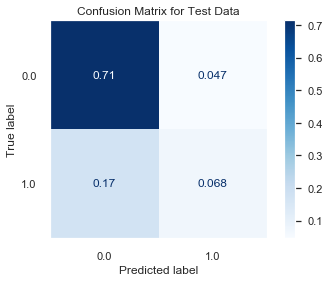

In [42]:
#Confusion Matrix - Test Data
mt.plot_confusion_matrix(logistic_regression,X_test_scaled,Y_test,cmap=plt.cm.Blues,normalize='all')
plt.title("Confusion Matrix for Test Data")
plt.grid(False)

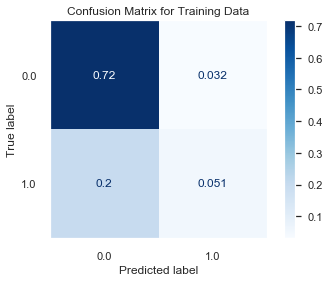

In [43]:
#Confusion Matrix - Training Data
mt.plot_confusion_matrix(logistic_regression,X_train_scaled,Y_train,cmap=plt.cm.Blues,normalize='all')
plt.title("Confusion Matrix for Training Data")
plt.grid(False)

The table below lists the normalized coefficients for the model. 

In [44]:
# output the coefficients
weights = logistic_regression.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
zip_vars = zip(weights,variable_names)

for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

Start_Lat has weight of 0.31352590233752686
Start_Lng has weight of 0.11516628937408951
Distance(mi) has weight of 0.12210458490346598
Temperature(F) has weight of -0.07888677508127012
Wind_Chill(F) has weight of -0.09341775024163418
Humidity(%) has weight of 0.015004188527656465
Pressure(in) has weight of -0.02366231879990105
Visibility(mi) has weight of 0.0037896326606294615
Wind_Speed(mph) has weight of 0.03816596229810123
Precipitation(in) has weight of -0.008288071996893279
PointOfInterest has weight of -0.3481214768223804
Bump has weight of -0.11456894332660017
Crossing has weight of -0.19611101616537294
Yield has weight of 0.16075772211110315
Junction has weight of 0.23160290963729388
No_Exit has weight of -0.10361310732413272
Railway has weight of -0.13097079666498207
Roundabout has weight of -0.04199675129557466
Station has weight of -0.2734869002184754
Stop has weight of -0.37566145437295206
Traffic_Calming has weight of 0.04643102069837401
Traffic_Signal has weight of -0.533

Let's plot the coefficients of the variables to see which ones have the most pull and which ones we may be able to use to reduce the model. We'll take the absolute values of the coefficients and sort them to determine what a possible cutoff threshold should be for variables to keep and variables to remove. Given the current number of features the graph labels may be difficult to read, however since we're making a threshold cut this should have minimial impact at this point. 

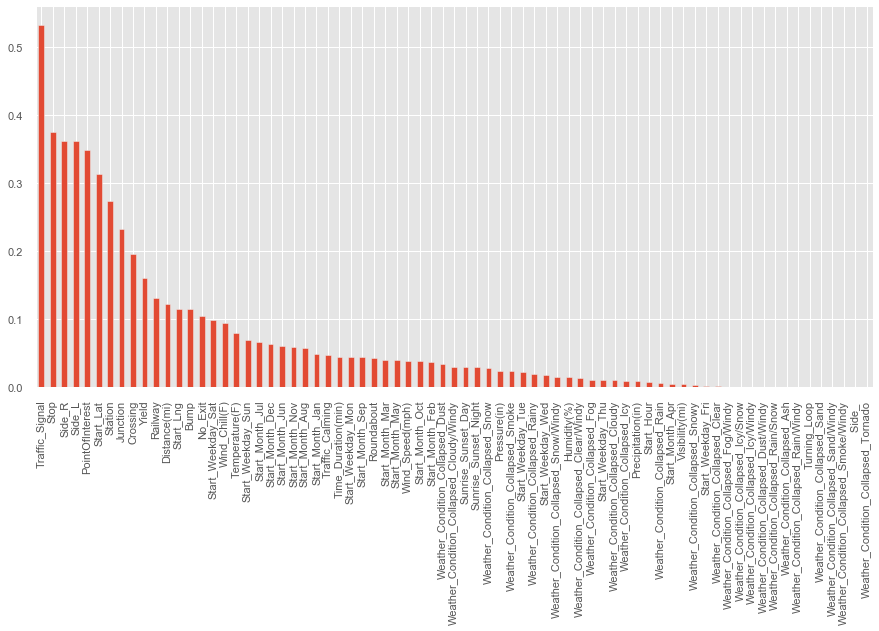

In [45]:
# now let's make a pandas Series with the names and values, and plot them
%matplotlib inline
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

variable_names = df_X_train.columns

weights = pd.Series(abs(logistic_regression.coef_[0]),index=variable_names).sort_values(ascending=False)             
weights.plot(kind='bar')
plt.show()

The initial cut of the data seems to indicate that any values below approximately 0.2 we can remove as they have little impact on the model. Let's get a closer look at which features remain.

In [49]:
# output the coefficients
coefToKeep = []
weights = logistic_regression.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
for coef, name in zip(weights,variable_names):
    if abs(coef[0]) >= 0.2:
        print(name, 'has weight of', coef[0])
        coefToKeep.append(name)

Start_Lat has weight of 0.31352590233752686
PointOfInterest has weight of -0.3481214768223804
Junction has weight of 0.23160290963729388
Station has weight of -0.2734869002184754
Stop has weight of -0.37566145437295206
Traffic_Signal has weight of -0.5331239386474351
Side_L has weight of -0.3616032190213297
Side_R has weight of 0.3616032190214555


As a quick sanity check of the remaining features let's see if they start to make sense. The scaled model is bringing back longititude but not latitude. We'll put latitude back in the model as both of these values are required into order to complete a geospatial view. The other items look logical. We see states with higher populations (CA, FL) showing up in the data set. 

In [50]:
coefToKeep.append('Start_Lng')

In [51]:
#skinny down the data to the Coefficients to keep list to see what happens to our model.
df_X_Train2 = pd.DataFrame(X_train_scaled,columns=df_X_train.columns)
df_X_Test2 = pd.DataFrame(X_test_scaled,columns=df_X_test.columns)

df_X_Train2 = df_X_Train2[coefToKeep]
df_X_Test2 = df_X_Test2[coefToKeep]

#convert our test/train dataframes to numpy arrays
X_train2 = df_X_Train2.to_numpy()
X_test2 = df_X_Test2.to_numpy()

In [52]:
#NOTE: Code below adapted from the course lectures
# we want to normalize the features based upon the mean and standard deviation of each column. 
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train2) # find scalings for each column that make this zero mean and unit std

X_train2_scaled = scl_obj.transform(X_train2) # apply to training
X_test2_scaled = scl_obj.transform(X_test2) # apply those means and std to the test set 

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') 
lr_clf.fit(X_train2_scaled,y_train)  # train object

Y_hat=lr_clf.predict(X_test2_scaled) # get test set predictions

print(mt.classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86     31166
         1.0       0.54      0.07      0.12      9757

    accuracy                           0.76     40923
   macro avg       0.66      0.53      0.49     40923
weighted avg       0.72      0.76      0.69     40923



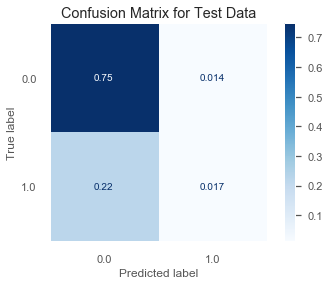

In [53]:
#Confusion Matrix
mt.plot_confusion_matrix(lr_clf,X_test2_scaled,Y_test,cmap=plt.cm.Blues,normalize='all')
plt.title("Confusion Matrix for Test Data")
plt.grid(False)

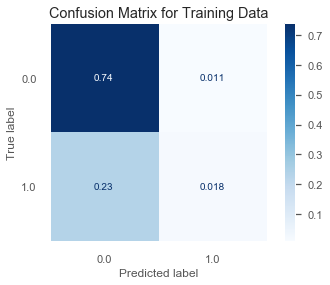

In [54]:
#Confusion Matrix
mt.plot_confusion_matrix(lr_clf,X_train2_scaled,Y_train,cmap=plt.cm.Blues,normalize='all')
plt.title("Confusion Matrix for Training Data")
plt.grid(False)

Comparing this new model to the original model we see that our recall for high severity incidents increase to 0.69 from 0.62. This would indicate we've gotten slightly better at predicting high severity accidents. Recall on predicting low severity incidents decreased from 0.77 to 0.70. 

To see if we can get any better, let's execute a Randomized Search. 

In [124]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0,n_jobs=-1)
search = clf.fit(X_train_scaled, y_train)

# get test set predictions
Y_hat=search.predict(X_test_scaled) 

print(mt.classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87     31166
         1.0       0.59      0.28      0.38      9757

    accuracy                           0.78     40923
   macro avg       0.70      0.61      0.62     40923
weighted avg       0.76      0.78      0.75     40923



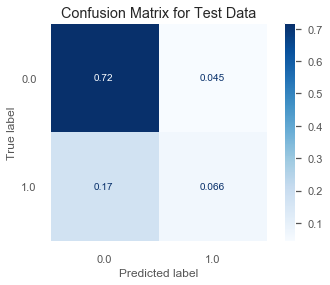

In [125]:
#Confusion Matrix
mt.plot_confusion_matrix(search,X_test_scaled,Y_test,cmap=plt.cm.Blues,normalize='all')
plt.title("Confusion Matrix for Test Data")
plt.grid(False)

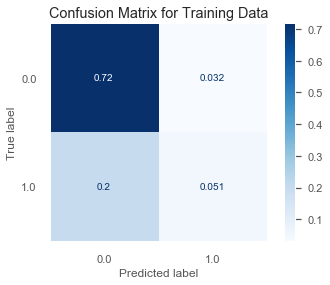

In [126]:
#Confusion Matrix
mt.plot_confusion_matrix(search,X_train_scaled,Y_train,cmap=plt.cm.Blues,normalize='all')
plt.title("Confusion Matrix for Training Data")
plt.grid(False)

In [122]:
#Create a Linear Regression object and perform a grid search to find the best parameters
logistic = LogisticRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}
scoring = ['recall']
C=uniform(loc=0, scale=4)
distributions = dict(C=C,penalty=['l2', 'l1'])
#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=logistic
                   , verbose=1 # low verbosity
                   , param_grid=distributions
                   , n_jobs=-1)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_train_scaled, Y_train)

ValueError: Parameter values for parameter (C) need to be a sequence(but not a string) or np.ndarray.

In [59]:
Y_hat=regGridSearch.predict(X_test_scaled) # get test set predictions

print(mt.classification_report(Y_test,Y_hat))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### Continuous Variable Modeling

In [69]:
# Get validation set off of last 20% of train data
df_train=df_train.sort_values("Start_Time")
train_size = int(len(df_train) * 0.8)

X_train, X_val = df_train[0:train_size], df_train[train_size:len(df_train)]

y = df_train['Distance(mi)']
y_train, y_val = y[0:train_size], y[train_size:len(y)]

#Build training/validation set for severity
df_X_train = X_train.copy()
df_X_test = X_val.copy()

df_Y_train = y_train.copy()
df_Y_test = y_val.copy()

#list columns to remove:
#removeList = {'Distance(mi)', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time','Unnamed: 0', 'TMC_200.0',
#    'TMC_201.0','TMC_202.0','TMC_203.0',
#    'TMC_206.0','TMC_222.0','TMC_229.0',
#    'TMC_236.0','TMC_239.0','TMC_241.0',
#    'TMC_244.0','TMC_245.0','TMC_246.0',
#    'TMC_247.0','TMC_248.0','TMC_336.0',
#    'TMC_339.0','TMC_341.0','TMC_343.0',
#    'TMC_351.0','TMC_406.0'} 

removeList = {'Distance(mi)', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time', 'TMC_200.0',
              'TMC_201.0','TMC_202.0','TMC_203.0',
              'TMC_206.0','TMC_222.0','TMC_229.0',
              'TMC_236.0','TMC_239.0','TMC_241.0',
              'TMC_244.0','TMC_245.0','TMC_246.0',
              'TMC_247.0','TMC_248.0','TMC_336.0',
              'TMC_339.0','TMC_341.0','TMC_343.0',
              'TMC_351.0','TMC_406.0','ST_AL','ST_AR','ST_AZ','ST_CA','ST_CO','ST_CT','ST_DC','ST_DE',
              'ST_FL','ST_GA','ST_IA','ST_ID','ST_IL','ST_IN','ST_KS','ST_KY','ST_LA','ST_MA','ST_MD',
              'ST_ME','ST_MI','ST_MN','ST_MO','ST_MS','ST_MT','ST_NC','ST_ND','ST_NE','ST_NH','ST_NJ',
              'ST_NM','ST_NV','ST_NY','ST_OH','ST_OK','ST_OR','ST_PA','ST_RI','ST_SC','ST_SD','ST_TN',
              'ST_TX','ST_UT','ST_VA','ST_VT','ST_WA','ST_WI','ST_WV','ST_WY'} 

df_X_train.drop(removeList,1,inplace=True)
df_X_test.drop(removeList,1,inplace=True)

In [70]:
#Convert dataframes to numpy arrays
X_train = df_X_train.values
X_test = df_X_test.values

Y_train = df_Y_train.values
Y_test = df_Y_test.values

In [71]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set 

### Linear Regression - Distance

In [75]:
#Linear regression - Distance
%time
linear_regression= LinearRegression()
linear_regression.fit(X_train,Y_train)
Y_pred=linear_regression.predict(X_test)

# EV - higher = better performing | Higher = worse
predict_ev = mt.explained_variance_score(Y_test, Y_pred) 

# MAE - higher = worse performing | lower = better
predict_mae = mt.mean_absolute_error(Y_test, Y_pred)

# MSE - higher = worse performing | lower = better
predict_mse = mt.mean_squared_error(Y_test, Y_pred)  

# r2 score
predict_score2 = mt.r2_score(Y_test, Y_pred)

# Accuracy | Accuracy = (TP+TN)/Total
print("EV: ",predict_ev)
print("MAE: ",predict_mae)
print("MSE: ",predict_mse)
print("R2: ",predict_score2)

Wall time: 0 ns
EV:  -0.002339751238105814
MAE:  0.10908772668659038
MSE:  0.6688575464130352
R2:  -0.0023545656253660674


In [77]:
# output the coefficients
weights = linear_regression.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
zip_vars = zip(weights,variable_names)

for coef, name in zip_vars:
    print(name, 'has weight of', coef)

Severity has weight of 0.04860914383837195
Start_Lat has weight of -0.007658556939255162
Start_Lng has weight of -0.008484052895723324
Temperature(F) has weight of -0.0003275591966855958
Wind_Chill(F) has weight of 0.0007316584696011663
Humidity(%) has weight of 1.7551294289055454e-05
Pressure(in) has weight of 0.0012510170029810697
Visibility(mi) has weight of -0.0006027629064084862
Wind_Speed(mph) has weight of 0.0015638705795380983
Precipitation(in) has weight of 0.031814294000254366
PointOfInterest has weight of -0.001010688499698357
Bump has weight of -0.004798912959033099
Crossing has weight of -0.0024482272780161816
Yield has weight of -0.004285423876696242
Junction has weight of -0.007211051675443881
No_Exit has weight of -0.009988589691219447
Railway has weight of 0.005440630141021164
Roundabout has weight of -0.03709651579295682
Station has weight of -0.017374126436295316
Stop has weight of -0.014666851616315861
Traffic_Calming has weight of -0.02902720522174021
Traffic_Signa

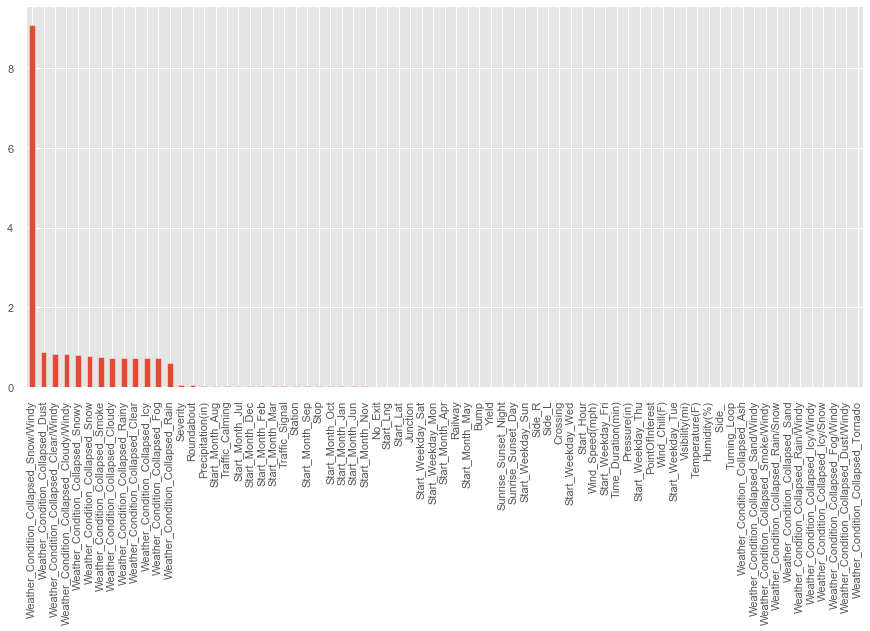

In [78]:
# now let's make a pandas Series with the names and values, and plot them
%matplotlib inline
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

variable_names = df_X_train.columns

weights = pd.Series(abs(linear_regression.coef_),index=variable_names).sort_values(ascending=False)             
weights.plot(kind='bar')
plt.show()

In [79]:
# output the coefficients
coefToKeep = []
weights = linear_regression.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
for coef, name in zip(weights,variable_names):
    if abs(coef) >= 0.04:
        print(name, 'has weight of', coef)
        coefToKeep.append(name)

Severity has weight of 0.04860914383837195
Weather_Condition_Collapsed_Clear has weight of -0.7248486895954845
Weather_Condition_Collapsed_Clear/Windy has weight of -0.8253123740417068
Weather_Condition_Collapsed_Cloudy has weight of -0.7355064009283823
Weather_Condition_Collapsed_Cloudy/Windy has weight of -0.8251086218293726
Weather_Condition_Collapsed_Dust has weight of -0.8645322148176104
Weather_Condition_Collapsed_Fog has weight of -0.7186524998628008
Weather_Condition_Collapsed_Icy has weight of -0.724038351815199
Weather_Condition_Collapsed_Rain has weight of -0.6032350734574237
Weather_Condition_Collapsed_Rainy has weight of -0.7354637757226316
Weather_Condition_Collapsed_Smoke has weight of -0.7504510514728293
Weather_Condition_Collapsed_Snow has weight of -0.7890137885972562
Weather_Condition_Collapsed_Snow/Windy has weight of 9.101073223130033
Weather_Condition_Collapsed_Snowy has weight of -0.8049103809893622


In [80]:
df_X_Train2 = pd.DataFrame(X_train_scaled,columns=df_X_train.columns)
df_X_Test2 = pd.DataFrame(X_test_scaled,columns=df_X_test.columns)

df_X_Train2 = df_X_Train2[coefToKeep]
df_X_Test2 = df_X_Test2[coefToKeep]

#convert our test/train dataframes to numpy arrays
X_train2 = df_X_Train2.to_numpy()
X_test2 = df_X_Test2.to_numpy()

In [81]:
#Linear regression - Distance
%time
linear_regression= LinearRegression()
linear_regression.fit(X_train2,Y_train)
Y_pred=linear_regression.predict(X_test2)

# EV - higher = better performing | Higher = worse
predict_ev = mt.explained_variance_score(Y_test, Y_pred) 

# MAE - higher = worse performing | lower = better
predict_mae = mt.mean_absolute_error(Y_test, Y_pred)

# MSE - higher = worse performing | lower = better
predict_mse = mt.mean_squared_error(Y_test, Y_pred)  

# r2 score
predict_score2 = mt.r2_score(Y_test, Y_pred)

# Accuracy | Accuracy = (TP+TN)/Total
print("EV: ",predict_ev)
print("MAE: ",predict_mae)
print("MSE: ",predict_mse)
print("R2: ",predict_score2)

Wall time: 0 ns
EV:  -2195385895753706.5
MAE:  1166867.101204604
MSE:  1466312678810998.0
R2:  -2197426366978522.0


In [99]:
#no of features
nof_list=np.arange(1,122)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,Y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,Y_train)
    score = model.score(X_test_rfe,Y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 46
Score with 46 features: 0.000674


In [98]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 46)
#Transforming data using RFE
X_train_rfe = rfe.fit_transform(X_train,Y_train) 
X_test_rfe = rfe.transform(X_test)
#Fitting the data to model
model.fit(X_train_rfe,Y_train)
rfe.score(X_test_rfe,Y_test)

ValueError: X has a different shape than during fitting.

In [91]:
# output the coefficients
coefNames = []
weights = model.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
zip_vars = zip(weights,variable_names)

for coef, name in zip_vars:
    print(name, 'has weight of', coef)
    coefNames.append(name)

Severity has weight of 0.048263802135464044
Start_Lat has weight of -0.0061208734151010635
Start_Lng has weight of -0.008877105726937676
Temperature(F) has weight of 0.0027434954573915676
Wind_Chill(F) has weight of 0.041246721006670144
Humidity(%) has weight of -0.0025698958462762422
Pressure(in) has weight of -0.005654657812503388
Visibility(mi) has weight of -0.00672415552145932
Wind_Speed(mph) has weight of -0.010493868360050203
Precipitation(in) has weight of 0.004269124177005947
PointOfInterest has weight of -0.037704172688210656
Bump has weight of -0.015433140737330674
Crossing has weight of -0.01740708154754532
Yield has weight of -0.029267062847651626
Junction has weight of -0.01809639215877625
No_Exit has weight of 0.0015033505564307997
Railway has weight of -0.0023137210836713124
Roundabout has weight of 0.00231372108366182
Station has weight of 0.004559189312522976
Stop has weight of -0.00455918931256196
Traffic_Calming has weight of -0.0016939474069919364
Traffic_Signal ha

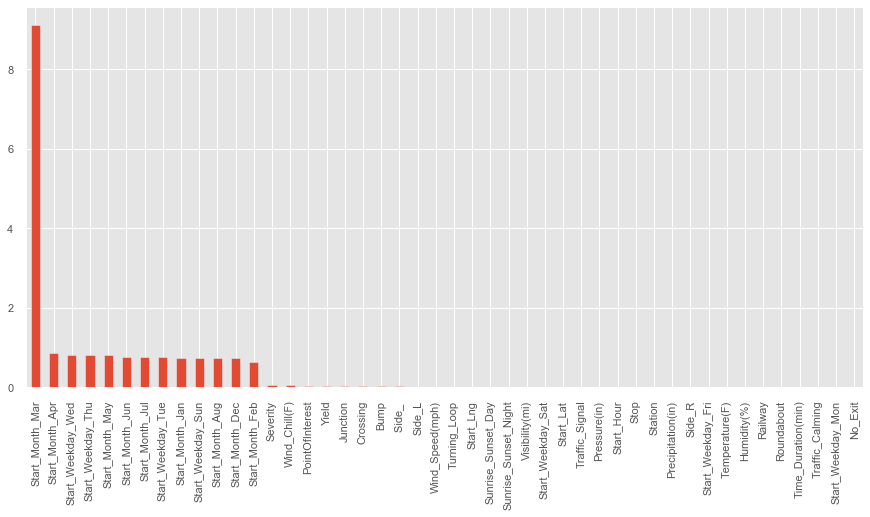

In [92]:
# now let's make a pandas Series with the names and values, and plot them
%matplotlib inline
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

variable_names = df_X_train.columns

weights = pd.Series(abs(model.coef_),index=coefNames).sort_values(ascending=False)             
weights.plot(kind='bar')
plt.show()

## Model Deployment - 5pts

## Exceptional Work - 10pts